Ada sekitar 4 miliar query pencarian yang dilakukan pada mesin pencarian Google setiap harinya, yang berarti ada sekitar 46ribuan query pencarian yang dilakukan setiap detiknya. Ini menunjukkan bahwa adanya mesin pencarian sangat dibutuhkan masyarakat setiap detik dalam keseharian mereka. Google menjadi salah satu platform penyedia layanan ini yang menjadi andalan masyarakat.

Pada proyek kali ini kita akan memanfaatkan salah satu layanan Google, yaitu Google Trends yang juga menyediakan fitur yang disebut API (Application Programming Interface) yang mana akan kita gunakan untuk menganalisa data pencarian harian pada Google. Kita akan menggunakan Python untuk melakukan proyek ini, serta kita juga akan menggunakan library **pytrends**. Library ini berisi fungsi-fungsi serta modul yang berguna untuk mengakses data historis dari Google Trends menggunakan API yang disediakan google.

Pada proses analisa kali ini data yang akan digunakan adalah data historis dari salah satu trending topic query yang terjadi di Indonesia dalam kurun 4 bulan terakhir atau kuartal awal 2023 (Januari - April atau awal Mei), yaitu tentang "Artificial Intelligence".

Selain **pytrends**, library lain yang akan digunakan dalam analisa ini adalah **pandas**, dan **matplotlib**.

In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trends = TrendReq()

In [ ]:
# Akan menganalisa trend tentang topik Artificial Intelligence di Indonesia

# Buat objek TrendReq dengan parameter ID sebagai Indonesia
trends = TrendReq(hl='id-ID', tz=420, geo='ID')

# Atur rentang waktu yang diinginkan
timeframe = '2023-01-01 2023-04-30'

# Mengatur kata kunci yang ingin dicari
kw_list = ['Artificial Intelligence']

# Membangun payload dan mendapatkan data berdasarkan parameter yang ditentukan
trends.build_payload(kw_list=kw_list,
                     timeframe=timeframe,
                     geo='ID')
data = trends.interest_by_region()
data = data.sort_values(by='Artificial Intelligence', ascending=False)
data = data.head(10)

In [ ]:
print(data)

                               Artificial Intelligence
geoName                                               
Maluku                                             100
Daerah Istimewa Yogyakarta                          82
Daerah Khusus Ibukota Jakarta                       61
Sulawesi Tengah                                     55
Sulawesi Selatan                                    50
Banten                                              45
Jawa Barat                                          41
Jawa Tengah                                         41
Jawa Timur                                          41
Sumatera Barat                                      40


<ipython-input-23-4149b5051038>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


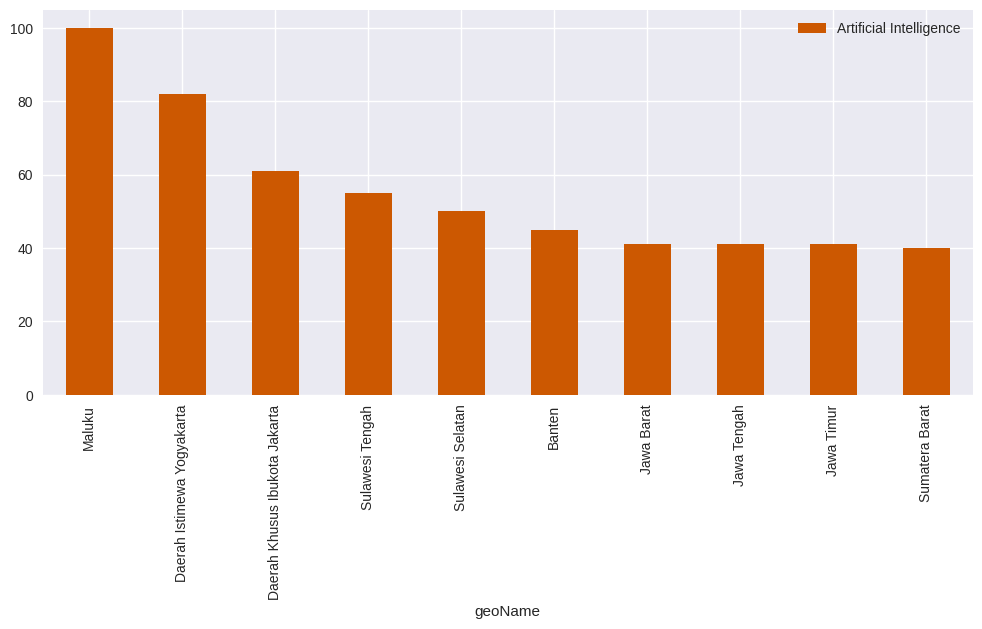

In [ ]:
# Data menunjukkan bahwa search queries tentang topik Artifial Intelligence banyak dicari di provinsi Maluku
# Visualisasikan untuk detail
data.reset_index().plot(x='geoName',
                        y='Artificial Intelligence',
                        figsize=(12, 5), kind='bar', color='#CC5801')
plt.style.use('seaborn')
plt.show()

Selama 4 bulan terakhir sejak Januari topik tentang Artifical Intelligence (AI) begitu menarik perhatian masyarakat dunia, bahkan Indonesia. Cukup mengejutkan karena data diatas menujukkan bahwa search query tentang topik ini begitu banyak dicari di provinsi Maluku.

<ipython-input-26-7aaf8f2d284d>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


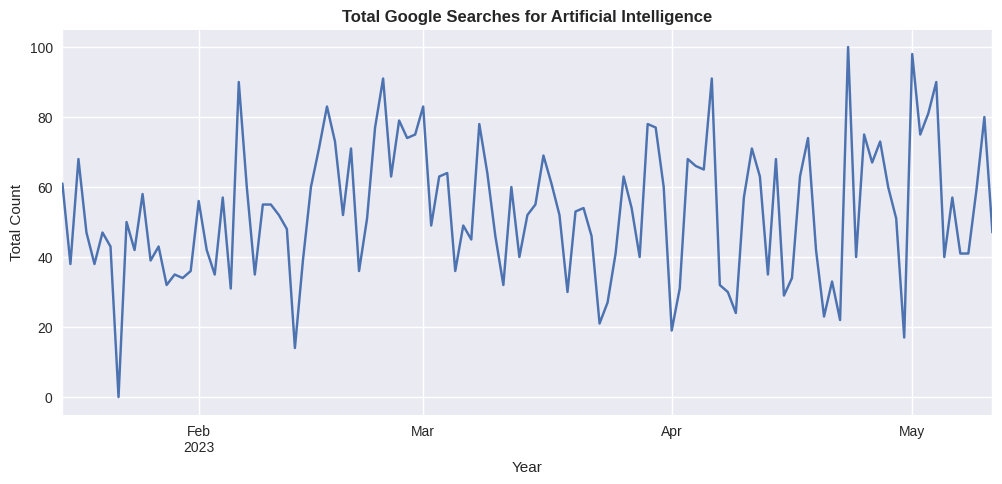

In [ ]:
from datetime import datetime, timedelta
# Define timeframe
end_date = datetime.now()
start_date = end_date - timedelta(days=4 * 30)

# Define parameter
data = TrendReq(hl='id-ID', tz=420, geo='ID')
data.build_payload(kw_list=['Artificial Intelligence'],
                   timeframe=start_date.strftime('%Y-%m-%d') + ' ' + end_date.strftime('%Y-%m-%d'))
data = data.interest_over_time()

# Define plot figure
fig, ax = plt.subplots(figsize=(12, 5))

data['Artificial Intelligence'].plot()
plt.style.use('seaborn')
plt.title('Total Google Searches for Artificial Intelligence',
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

**Conclusion**

Dari grafik diatas dapat disimpulkan dalam kuartal pertama 2023 topik pembahasan tentang Artifical Intelligence atau AI sangat menghangat di Indonesia. Hal ini disebabkan banyak perusahaan baik dalam dan luar negeri menerapkan terobosan teknologi ini. Selama 4 bulan terakhir query tentang topik ini banyak dicari. Dapat dikatakan akhir April dan awal Mei menjadi puncak, karena kita tahu banyak perusahaan dunia, semisal Google mengadakan event yang menyatakan project mereka kedepan tentang perkembangan AI sangat menarik perhatian masyarakat, bahkan masyarakat Indonesia.